In [2]:
from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display

In [3]:
import networkx as nx

In [4]:
%matplotlib inline

In [5]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()

In [6]:
sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii1'),('right', 'iii1'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'hg2'),('right', 'hg2'),
            ('left', 'hg3'),('right', 'hg3'),
            ('left', 'hg4'),('right', 'hg4'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]

graphs = {}
for fly in flylist:
    state_mtrx = np.vstack([fly.spikestates[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    #plt.imshow(std_mtrx[:,1000:1500],aspect = 'auto',interpolation = 'nearest')
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    #dsq = np.sqrt(np.diag(cov_mtrx))
    #cor_mtrx = np.dot(np.dot(dsq,cov_mtrx),dsq)

    G = nx.Graph()

    for i,lbl1 in enumerate(sorted_keys):
        for j,lbl2 in enumerate(sorted_keys):
            G.add_edge(lbl1,lbl2,weight = cor_mtrx[i,j])
    graphs[fly.flynum] = G

In [7]:
#plt.figure(figsize = (5,5))
#plt.imshow(cor_mtrx,interpolation = 'nearest')
#plt.gca().set_yticks(range(len(sorted_keys)))
#lbs = plt.gca().set_yticklabels(['%s %s'%k for k in sorted_keys]) 
#plt.gca().set_xticks(range(len(sorted_keys)))
#lbs = plt.gca().set_xticklabels(['%s %s'%k for k in sorted_keys],rotation = 90) 

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


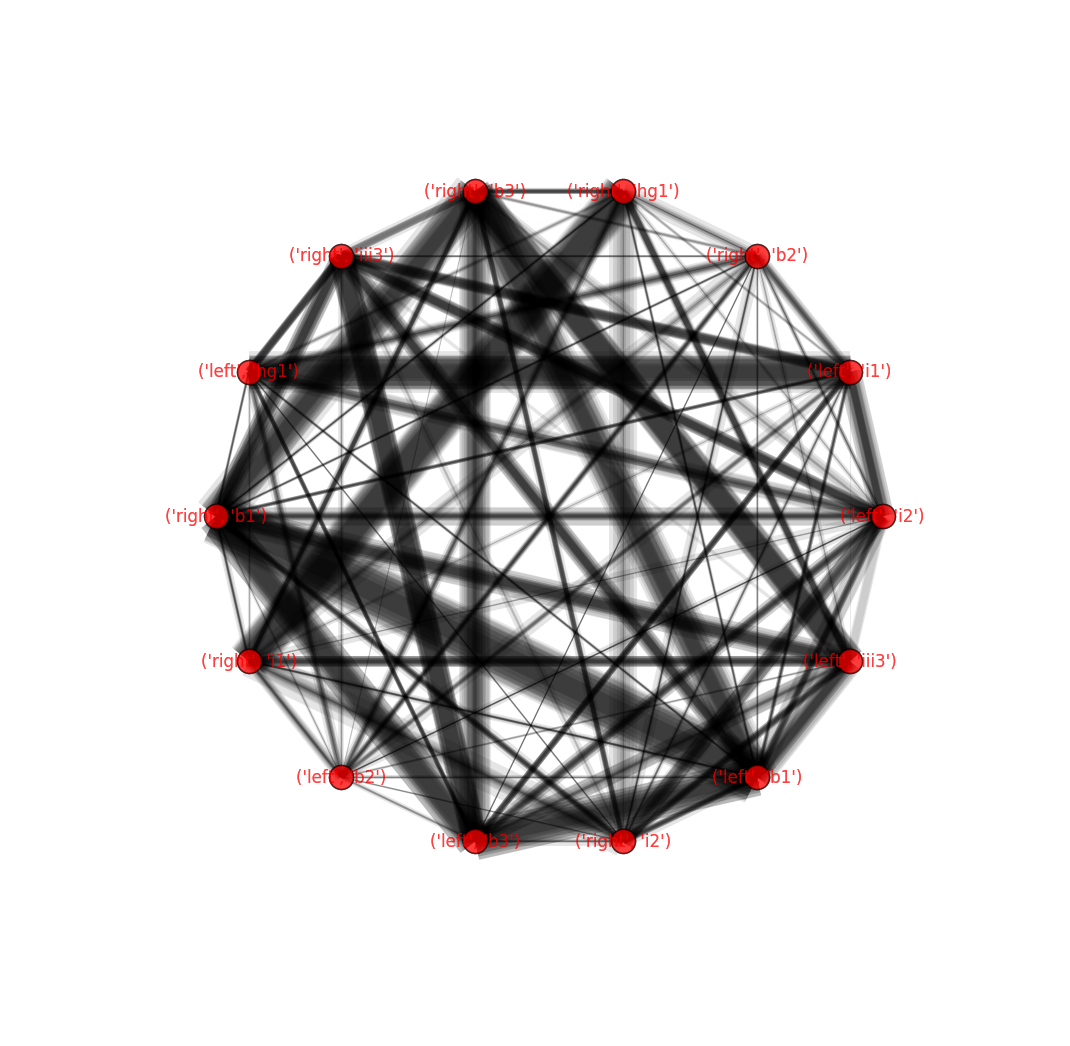

In [9]:
figure = plt.figure(figsize = (10,10))

for flynum,G in graphs.items():
    edges= G.edges
    weights = [G[e[0]][e[1]]['weight']**1.2/10000. for e in edges]
    nx.draw_circular(G,font_color = 'r',with_labels= True,width = weights,alpha = 0.1)